## 1. üìä  ***Objetivo e Contexto***

**Este projeto busca entender os fatores que levam ao aumento da rotatividade (Turnover) na IBM, tendo em vista que o √≠ndice atual est√° em 16%. Nosso objetivo por meio dessa an√°lise √© identificar, analisar e propor uma solu√ß√£o que vise reduzir sa√≠das, reter e desenvolver talentos.**

## 2. ‚öôÔ∏è Configura√ß√µes Iniciais e Importa√ß√£o de Bibliotecas

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [39]:
# Carregamento e limpeza dos dados.

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_raw = df.copy()


In [ ]:
# Exibe a estrutura do DataFrame: colunas, tipos de dados, contagem de n√£o-nulos e uso de mem√≥ria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## 3. Limpeza e Pr√©-Processamento


In [42]:
# EmployeeCount: Coluna constante (todos os valores s√£o iguais), n√£o contribui com variabilidade para a an√°lise.
# EmployeeNumber: Identificador √∫nico do funcion√°rio, sem rela√ß√£o anal√≠tica direta com turnover.
# HourlyRate: Baixa varia√ß√£o e geralmente n√£o reflete benef√≠cios totais (como b√¥nus), por isso tende a n√£o se correlacionar com o churn.
# Over18: Todos os funcion√°rios s√£o maiores de 18 anos, tornando a coluna irrelevante para a an√°lise.
# StandardHours: Todos os registros possuem o mesmo valor, logo n√£o h√° utilidade anal√≠tica.
# PerformanceRating: Como mais de 80% dos funcion√°rios t√™m a mesma avalia√ß√£o (nota 3), a vari√°vel possui baixa vari√¢ncia e reduzido poder preditivo.

df[['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours']].head(7)

EmployeeCount  EmployeeNumber  HourlyRate Over18  StandardHours
0              1               1          94      Y             80
1              1               2          61      Y             80
2              1               4          92      Y             80
3              1               5          56      Y             80
4              1               7          40      Y             80
5              1               8          79      Y             80
6              1              10          81      Y             80

In [43]:
# Remo√ß√£o das mesmas colunas j√° citadas.

df.drop(['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours', 'PerformanceRating'], axis=1, inplace=True)

In [44]:
pd.set_option('display.max_columns', None)
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
822    34       1003                 2          2                        4   
925    42        603                 7          4                        2   
1120   38        437                16          3                        2   
782    30       1176                20          3                        3   
1009   58       1055                 1          3                        4   

      JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
822                3         2                3           4033        15834   
925                4         2                2           2372         5628   
1120               3         2                2           4198        16379   
782                3         2                1           9957         9096   
1009               3         5                1          19701        22456   

      NumCompaniesWorked  PercentSalaryHike  RelationshipSatisfaction  \
822                    2                 11                         4   
925                    6                 16                         4   
1120                   2                 12                         2   
782                    0                 15                         3   
1009                   3                 21                         3   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
822                  0                  5                      3   
925                  0                 18                      2   
1120                 0                  8                      5   
782                  1                  7                      1   
1009                 1                 32                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
822                 2               3                   2   
925                 3               1                   0   
1120                4               3                   2   
782                 2               6                   2   
1009                3               9                   8   

      YearsSinceLastPromotion  YearsWithCurrManager  
822                         0                     2  
925                         0                     0  
1120                        1                     2  
782                         0                     2  
1009                        1                     5

## 4. üß† Transforma√ß√£o de Vari√°veis Ordinais

In [45]:
# Convers√£o de vari√°veis ordinais com valores num√©ricos em categorias leg√≠veis, melhorando a interpreta√ß√£o visual.

df['Education'] = df['Education'].replace({1:'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
df['JobLevel'] = df['JobLevel'].replace({1:'Entry Level', 2: 'Junior Level', 3:'Mid Level', 4:'Senior Level', 5:'Executive'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1:'Dissatisfied', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied'})

## 5. üìä An√°lise Explorat√≥ria Univariada

In [46]:
# Esta etapa nos permite visualizar estat√≠sticas descritivas, como valor m√≠nimo, m√°ximo, m√©dia e percentis das vari√°veis num√©ricas.
df.describe().T

count          mean          std     min     25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.0   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.0   
StockOptionLevel         1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.0   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.0   

                             50%      75%      max  
Age                         36.0     43.0     60.0  
DailyRate                  802.0   1157.0   1499.0  
DistanceFromHome             7.0     14.0     29.0  
MonthlyIncome             4919.0   8379.0  19999.0  
MonthlyRate              14235.5  20461.5  26999.0  
NumCompaniesWorked           2.0      4.0      9.0  
PercentSalaryHike           14.0     18.0     25.0  
StockOptionLevel             1.0      1.0      3.0  
TotalWorkingYears           10.0     15.0     40.0  
TrainingTimesLastYear        3.0      3.0      6.0  
YearsAtCompany               5.0      9.0     40.0  
YearsInCurrentRole           3.0      7.0     18.0  
YearsSinceLastPromotion      1.0      3.0     15.0  
YearsWithCurrManager         3.0      7.0     17.0

In [47]:
df['Attrition'].value_counts(normalize=False)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [48]:
df['Attrition'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Attrition
No     83.88%
Yes    16.12%
Name: proportion, dtype: object

In [49]:
# Listagem das vari√°veis por tipo, para facilitar a an√°lise.

print("Object-type columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"  - {col}")

print("\nNumerical-type columns:")
for col in df.select_dtypes(include='number').columns:
    print(f"  - {col}")

Object-type columns:
  - Attrition
  - BusinessTravel
  - Department
  - Education
  - EducationField
  - EnvironmentSatisfaction
  - Gender
  - JobInvolvement
  - JobLevel
  - JobRole
  - JobSatisfaction
  - MaritalStatus
  - OverTime
  - RelationshipSatisfaction
  - WorkLifeBalance

Numerical-type columns:
  - Age
  - DailyRate
  - DistanceFromHome
  - MonthlyIncome
  - MonthlyRate
  - NumCompaniesWorked
  - PercentSalaryHike
  - StockOptionLevel
  - TotalWorkingYears
  - TrainingTimesLastYear
  - YearsAtCompany
  - YearsInCurrentRole
  - YearsSinceLastPromotion
  - YearsWithCurrManager


### 5.1 üîç An√°lise de Vari√°veis Categ√≥ricas

In [50]:
# An√°lise univariada do churn por categorias (vari√°veis do tipo object)
# Bins = faixas num√©ricas


obj_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Attrition']


max_attr = {}

for col in obj_cols:
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index')
    if 'Yes' in ct.columns:
        max_attr[col] = (ct['Yes'] * 100).max()
    else:
        max_attr[col] = 0.0

max_attr_series = pd.Series(max_attr).sort_values(ascending=False)

print("Highest % of 'Yes' Attrition by categorical column:")
print(max_attr_series.round(1))

Highest % of 'Yes' Attrition by categorical column:
JobRole                     39.8
JobInvolvement              33.7
WorkLifeBalance             31.2
OverTime                    30.5
JobLevel                    26.3
EducationField              25.9
MaritalStatus               25.5
EnvironmentSatisfaction     25.4
BusinessTravel              24.9
JobSatisfaction             22.8
RelationshipSatisfaction    20.7
Department                  20.6
Education                   18.2
Gender                      17.0
dtype: float64


In [51]:
def plot_high_attrition_cols(df, multiplier=1.6):
    thr = df.Attrition.eq('Yes').mean() * 100 * multiplier
    for col in df.select_dtypes('object').drop('Attrition', axis=1):
        max_pct = df.groupby(col).Attrition.apply(lambda s: s.eq('Yes').mean() * 100).max()
        if max_pct < thr:
            continue

        tot = df[col].value_counts().sort_index()
        yes = (df.loc[df.Attrition.eq('Yes'), col].value_counts().reindex(index=tot.index, fill_value=0))
        pct = (yes / tot * 100).round(1)
        data = pd.DataFrame({'Total': tot, 'Quit': yes, '% Quit': pct})

        ax = data[['Total','Quit']].plot(kind='barh',color=['#0072B2', '#E69F00'],edgecolor='black',figsize=(6, len(data) * 0.4 + 1))
        
        for i, (t, y, p) in enumerate(zip(data['Total'], data['Quit'], data['% Quit'])):
            ax.text(t + 1, i - 0.2, f'{int(t)}', va='center', fontsize=9)
            ax.text(y + 3, i + 0.2, f'{int(y)} ({p}%)', va='center', fontsize=9)

        ax.set_title(col, fontsize=12)
        ax.set_xlabel('Employees')
        ax.set_ylabel(col)
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        ax.legend(loc='upper right', frameon=False)
        plt.tight_layout()
        plt.show()

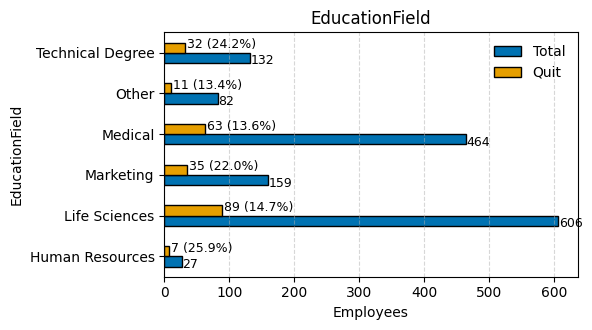

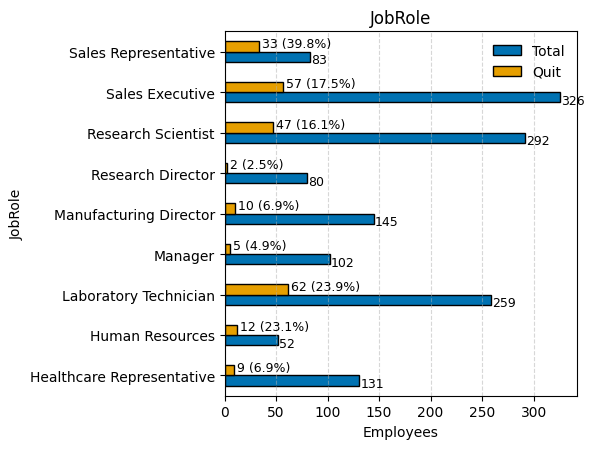

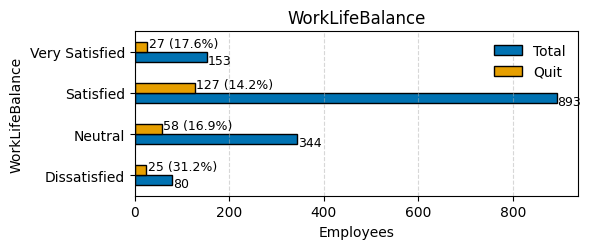

In [52]:
# EducationField: Pessoas com forma√ß√£o em Marketing talvez estejam menos alinhadas √†s oportunidades da empresa ou tenham alta demanda externa do mercado, apresentando sa√≠da de 22%.
# EducationField: J√° em Human Resources, 25% dos colaboradores saem... poss√≠vel ind√≠cio de problemas de cultura ou reconhecimento, pois s√£o justamente os respons√°veis pela reten√ß√£o de pessoas da empresa.
# *A√ß√£o*: Aplicar programa de feedback cont√≠nuo para mapear "dores" dos colaboradores e verificar se os profissionais de RH est√£o sobrecarregados ou desmotivados.

# JobInvolvement: Funcion√°rios com baixo envolvimento t√™m 33% de sa√≠da, o dobro de qualquer outro grupo. Baixo envolvimento indica falta de prop√≥sito, alinhamento ou reconhecimento.
# *A√ß√£o*: Realizar pesquisas de engajamento e entrevistas de sa√≠da. Implementar programas de feedback cont√≠nuo e reconhecimento.

# JobLevel: Colaboradores em Entry Level t√™m 26% de sa√≠da; possivelmente por inseguran√ßa, menor sal√°rio e maior propens√£o a buscar outras oportunidades.
# *A√ß√£o*: Criar um plano de desenvolvimento acelerado para novos talentos, refor√ßando a cultura de acolhimento e treinamento nos primeiros 6 - 12 meses.

# JobRole: Sales Representatives apresentam churn de 39%, quase o dobro de qualquer outro cargo. √Åreas comerciais costumam ter metas agressivas e alta press√£o.
# JobRole: Remunera√ß√£o vari√°vel baixa, falta de suporte ou burnout podem ser causas adicionais.
# *A√ß√£o*: Revisar a pol√≠tica de metas e comiss√µes, criar mentorias para vendedores novatos e reavaliar a gest√£o da √°rea.

# Overtime: Funcion√°rios que fazem horas extras regularmente t√™m sa√≠da de 30%, contra apenas 10% de quem n√£o faz. Forte indicativo de desequil√≠brio vida pessoal/trabalho ou m√° gest√£o de recursos.
# *A√ß√£o*: Monitorar o banco de horas por setor e negociar dias de folga conforme prefer√™ncia dos funcion√°rios, recompensando-os pelas horas extras e melhorando a satisfa√ß√£o e o moral.

# WorkLifeBalance: Nota-se que colaboradores "Dissatisfied" t√™m 31% de churn, e os "Neutral", 16%, ambos acima da m√©dia. Confirma a hip√≥tese de que qualidade de vida impacta diretamente na perman√™ncia.
# *A√ß√£o*: Criar programas de bem-estar, hor√°rios flex√≠veis, apoio psicol√≥gico e momentos de descompress√£o.

plot_high_attrition_cols(df, multiplier=1.6)

### 5.2 üßÆ An√°lise de Vari√°veis Num√©ricas

In [53]:
# An√°lise univariada das vari√°veis num√©ricas, agrupadas em faixas (bins), para encontrar onde h√° maior incid√™ncia de churn. 
# Bins = faixas num√©ricas

max_num_attr = {}

for col in df.select_dtypes(include='number').columns:
    bins = pd.qcut(df[col], 4, duplicates='drop')
    ct = pd.crosstab(bins, df['Attrition'], normalize='index')
    max_num_attr[col] = ct.get('Yes', 0).max() * 100

max_num_series = pd.Series(max_num_attr).sort_values(ascending=False)

print("Highest % of Attrition='Yes' by int64 column:")
print(max_num_series.round(1))

Highest % of Attrition='Yes' by int64 column:
MonthlyIncome              29.3
YearsAtCompany             26.0
Age                        25.9
TotalWorkingYears          25.6
YearsInCurrentRole         22.6
NumCompaniesWorked         21.8
YearsWithCurrManager       21.4
DistanceFromHome           20.6
DailyRate                  20.1
TrainingTimesLastYear      18.2
PercentSalaryHike          18.1
MonthlyRate                17.9
StockOptionLevel           17.1
YearsSinceLastPromotion    17.1
dtype: float64


In [54]:
# Fun√ß√£o para visualizar o churn (Attrition = 'Yes') por faixas (bins) de uma vari√°vel num√©rica.
# Ela agrupa os dados em intervalos com base em quantis e calcula a taxa de sa√≠da em cada um.
# A faixa com maior churn √© destacada visualmente para facilitar a identifica√ß√£o de zonas cr√≠ticas.
# √ötil para identificar padr√µes escondidos em vari√°veis como idade, renda, anos na empresa etc.


def plot_churn_by_bin(df, col, bins=5,highlight_color='#D55E00',bar_color='#009E73'):
    
    df[f"{col}_bin"] = pd.qcut(df[col], q=bins, duplicates='drop')
    churn_rate = (df.groupby(f"{col}_bin")['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).round(1))

    colors = [bar_color] * len(churn_rate)
    max_idx = churn_rate.idxmax()
    colors[list(churn_rate.index).index(max_idx)] = highlight_color

    ax = churn_rate.plot.barh(color=colors,edgecolor='black',figsize=(6, len(churn_rate)*0.4 + 1))
    
    ax.set_xlabel('% Attrition = Yes')
    ax.set_title(f'Churn by {col} bin')
    ax.set_yticklabels([f"{int(i.left):,}‚Äì{int(i.right):,}" for i in churn_rate.index])

    for i, rate in enumerate(churn_rate):
        ax.text(rate + 0.5, i, f'{rate}%', va='center')

    plt.tight_layout()
    plt.show()

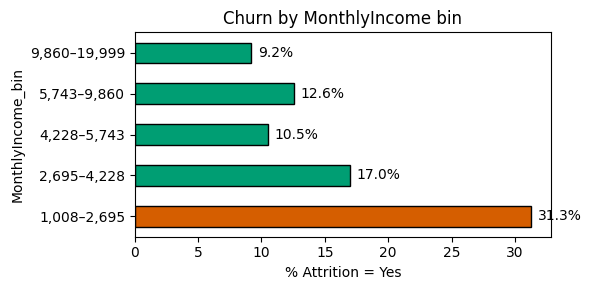

In [55]:
# Funcion√°rios com renda mensal abaixo de R$ 2.695 apresentam a maior taxa de Churn 31%. 
# Isso indica que sal√°rios baixos est√£o diretamente relacionados √† sa√≠da volunt√°ria e talvez at√© a busca por outras oportunidades externas.

# *A√ß√£o* : Revisar faixas salariais para posi√ß√µes iniciais ou operacionais. Oferecer incentivos n√£o financeiros, por exemplo: benef√≠cios, reconhecimento, b√¥nus por performance e tamb√©m a transpar√™ncia com plano de carreira.
plot_churn_by_bin(df, 'MonthlyIncome', bins=5)


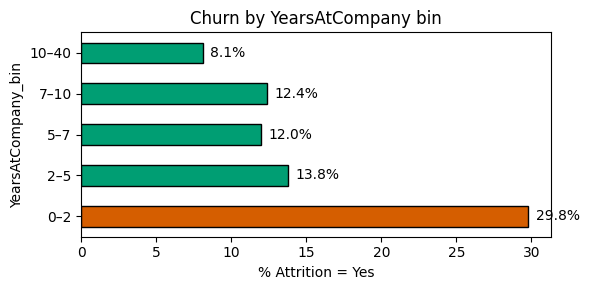

In [56]:
# Novos colaboradores com at√© 2 anos de empresa tem Churn de 29,8%, oque indica um poss√≠vel problema com onboarding, integra√ß√£o ou at√© expectativas frustradas. 

# *A√ß√£o* : Fortalecer o onboarding, propor treinamento para l√≠deres e melhorar integra√ß√£o nas primeiras semanas. Alinhar expectativas desde o recrutamento, evitando frustra√ß√µes 
plot_churn_by_bin(df, 'YearsAtCompany', bins=5)

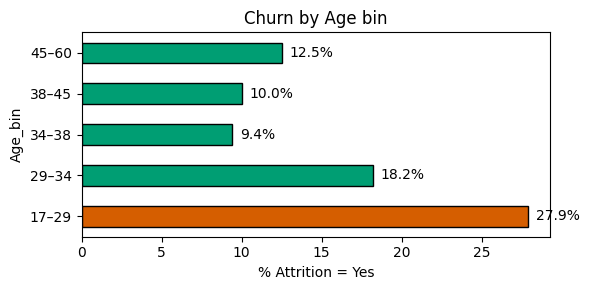

In [57]:
# Jovens no in√≠cio de carreira tendem a mudar mais de emprego em busca de crescimento profissional, remunera√ß√£o, cultura etc... 

# *A√ß√£o* : Desenvolver programas de reten√ß√£o para jovens talentos, como planos de carreira acelerados, refor√ßando o que j√° foi sugerido na an√°lise de "JobLevel".
plot_churn_by_bin(df, 'Age', bins=5)


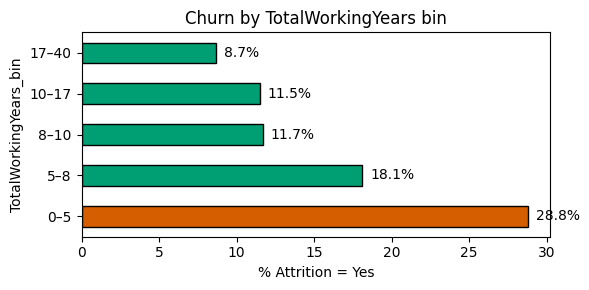

In [58]:
# Profissionais com at√© 05 anos de experi√™ncia tem um taxa de Churn de 28%, indicando maior rotatividade entre profissionais mais jovens ou rec√©m inseridos no mercado.

# *A√ß√£o* : Refor√ßar acompanhamento e desenvolvimento no in√≠cio de carreira, garantir alinhamento de expectativas e oferecer crescimento estruturado.
plot_churn_by_bin(df, 'TotalWorkingYears', bins=5)

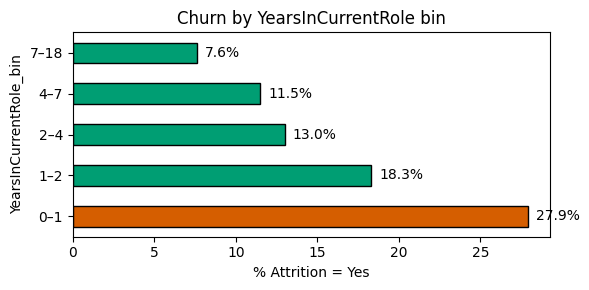

In [59]:
# Alta rotatividade para funcion√°rios em posi√ß√µes rec√©m assumidas, indicando falta de adapta√ß√£o ao novo cargo, promo√ß√£o mal planejada ou ajustes mal comunicados, taxa de Churn 27,9%.

# *A√ß√£o* : Garantir que a mudan√ßas de cargo venham acompanhadas de treinamento, onboarding interno e acompanhamento do gestor, aplicar feedback estruturado nos primeiros meses ap√≥s a promo√ß√£o.
plot_churn_by_bin(df, 'YearsInCurrentRole', bins=5)


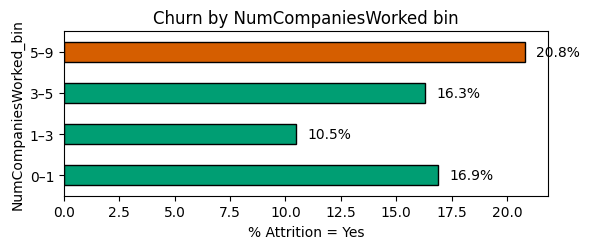

In [60]:
# Colaborador com hist√≥rico de mudan√ßas de 5 a 9 empresas, tendem a gerar um Churn de 20,8%.
# Isso pode indicar um perfil com baixa ou pouca perman√™ncia em algumas empresas, tamb√©m pode refletir baixa fideliza√ß√£o da empresa em reter talentos com ampla experi√™ncia.

# *A√ß√£o* : Durante o recrutamento, avaliar melhor o perfil de profissionais com hist√≥rico extenso de empresas, explorar motivos das sa√≠das anteriores em entrevistas.
plot_churn_by_bin(df, 'NumCompaniesWorked', bins=5)


In [61]:
# A troca recente de lideran√ßa pode gerar desalinhamento, inseguran√ßa ou quebra de confian√ßa. Isso refor√ßa a import√¢ncia da rela√ß√£o direta de gestor e colaborador, ap√≥s 1 ano o Churn cai para a faixa de 14%, metade!

# Investir em integra√ß√£o entre l√≠deres e novas equipes, aplicar follow-up nos 3 primeiros meses ap√≥s a mudan√ßa de gest√£o. Oferecer treinamento de lideran√ßa emp√°tica para novos gestores e feedback (1:1), Gestor e colaborador.
plot_churn_by_bin(df, 'YearsWithCurrManager', bins=5)


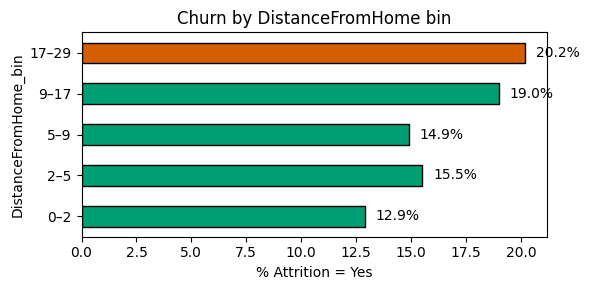

In [62]:
# A dist√¢ncia at√© o trabalho pode estar diretamente relacionada ao cansa√ßo e √† insatisfa√ß√£o com o deslocamento, al√©m de indiretamente amplificar os efeitos de pr√°ticas como o Overtime... 
# o que aumenta o tempo fora de casa e prejudica o equil√≠brio entre vida pessoal e profissional.

# *A√ß√£o* : Avaliar modelos de trabalho h√≠brido ou remoto para colaboradores que moram mais longe. Oferecer ajuda de custo com transporte ou flexibiliza√ß√£o de hor√°rios para evitar picos de tr√¢nsito.
plot_churn_by_bin(df, 'DistanceFromHome', bins=5)


## 6. ‚öôÔ∏è Pr√©-Processamento para Modelagem Preditiva


In [63]:
# Pr√©-processamento para modelagem preditiva. A vari√°vel alvo (Attrition) √© convertida para formato bin√°rio, e as vari√°veis independentes (X) s√£o divididas entre num√©ricas e categ√≥ricas.
# As categ√≥ricas s√£o transformadas em dummies (one-hot encoding), e a base resultante ser√° usada para treinar modelos de classifica√ß√£o.

y = df.Attrition.map({'No':0,'Yes':1})

num_cols = [
    'Age','DailyRate','DistanceFromHome','MonthlyIncome','MonthlyRate',
    'NumCompaniesWorked','PercentSalaryHike','StockOptionLevel',
    'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
    'Education','EnvironmentSatisfaction','JobInvolvement',
    'JobLevel','JobSatisfaction','RelationshipSatisfaction',
    'WorkLifeBalance']

cat_cols = ['OverTime','MaritalStatus','BusinessTravel','JobRole','EducationField']

X = pd.concat([df_raw[num_cols],pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)

## 7. üìè Correla√ß√£o entre Vari√°veis e Attrition


In [64]:
# C√°lculo da correla√ß√£o absoluta entre cada feature e Attrition, √∫til para priorizar vari√°veis na modelagem preditiva.

corr = X.corrwith(y).abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
corr.plot.bar()
plt.title('Absolute Correlation with Attrition')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

## 8. üå≥ Modelagem Preditiva - √Årvore de Decis√£o



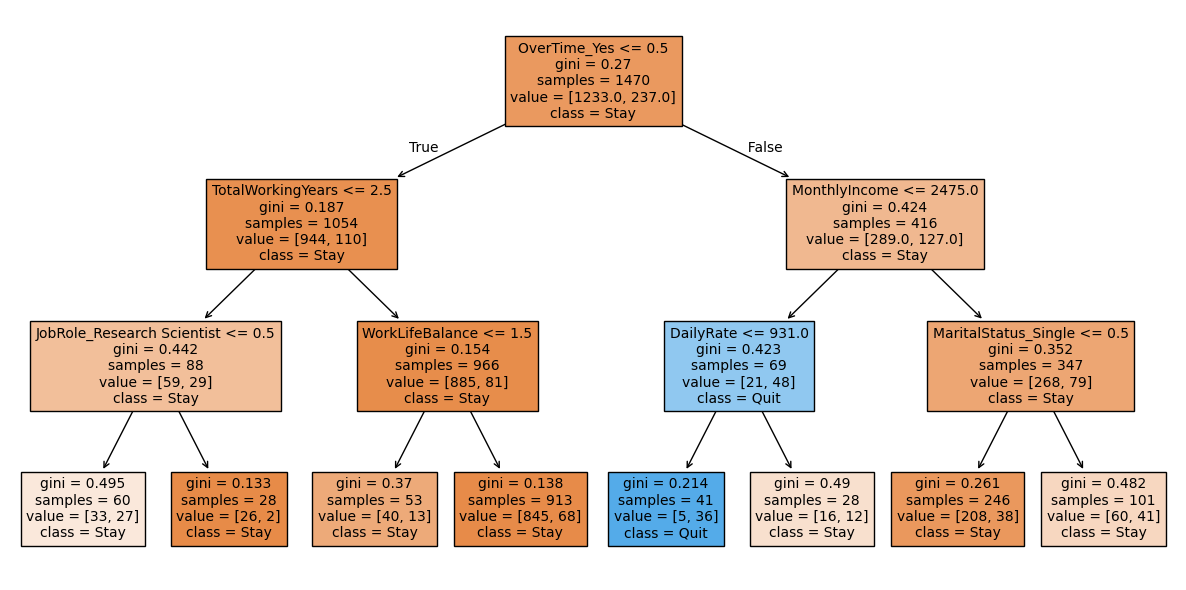

In [65]:
# A an√°lise mostra que funcion√°rios que fazem hora extra, t√™m pouca experi√™ncia e recebem sal√°rios mais baixos est√£o significativamente mais propensos a pedirem demiss√£o.

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(tree,feature_names=X.columns,class_names=['Stay','Quit'],filled=True,fontsize=10)
plt.tight_layout()
plt.show()

## 9. üìä Churn por Tempo de Empresa √ó Tempo Desde √öltima Promo√ß√£o

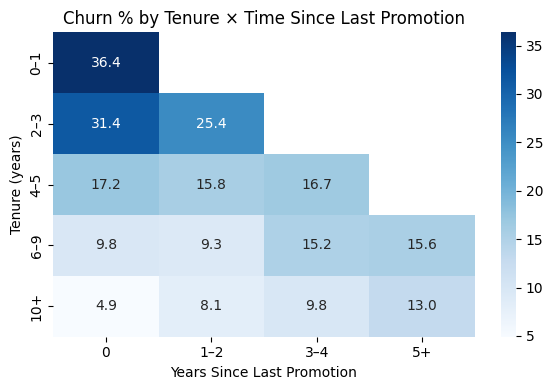

In [66]:
# Heatmap da taxa de churn (%), combinando o tempo de empresa e anos desde a √∫ltima promo√ß√£o.

# *A√ß√£o* : Criar estrat√©gias de reten√ß√£o para funcion√°rios com pouco tempo de casa, e, que n√£o tiverem promo√ß√£o com menos de 03 anos. Avaliar planos de desenvolvimento de carreira.

df_heat = df

prom_bins   = [0, 1, 3, 5, 40]
prom_labels = ['0', '1‚Äì2', '3‚Äì4', '5+']
df_heat['PromBin'] = pd.cut(df_heat['YearsSinceLastPromotion'],bins=prom_bins,labels=prom_labels,right=False)

yac_bins   = [0, 1, 3, 5, 10, 40]
yac_labels = ['0‚Äì1', '2‚Äì3', '4‚Äì5', '6‚Äì9', '10+']
df_heat['TenureBin'] = pd.cut(df_heat['YearsAtCompany'],bins=yac_bins,labels=yac_labels,right=False)

heat2 = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(heat2, annot=True, fmt='.1f', cmap='Blues')
plt.title('Churn % by Tenure √ó Time Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Tenure (years)')
plt.tight_layout()
plt.show()

## 9.1 üìä Churn por Tempo de Empresa √ó Tempo Desde √öltima Promo√ß√£o


In [67]:
# Descri√ß√£o n√∫merica de Total x Quit.

total = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].count().unstack())

quit_counts = (df_heat.groupby(['TenureBin','PromBin'])['Attrition'].apply(lambda s: (s == 'Yes').sum()).unstack())

print("Total employees by TenureBin and PromBin:\n", total)
print("\nEmployees who quit by TenureBin and PromBin:\n", quit_counts)

Total employees by TenureBin and PromBin:
 PromBin      0  1‚Äì2  3‚Äì4   5+
TenureBin                    
0‚Äì1         44    0    0    0
2‚Äì3        172  126    0    0
4‚Äì5         99  133    6    0
6‚Äì9        205  183   46   90
10+         61   74   61  169

Employees who quit by TenureBin and PromBin:
 PromBin       0   1‚Äì2  3‚Äì4    5+
TenureBin                       
0‚Äì1        16.0   NaN  NaN   NaN
2‚Äì3        54.0  32.0  NaN   NaN
4‚Äì5        17.0  21.0  1.0   NaN
6‚Äì9        20.0  17.0  7.0  14.0
10+         3.0   6.0  6.0  22.0


## 10. Churn por Faixa Et√°ria √ó OverTime


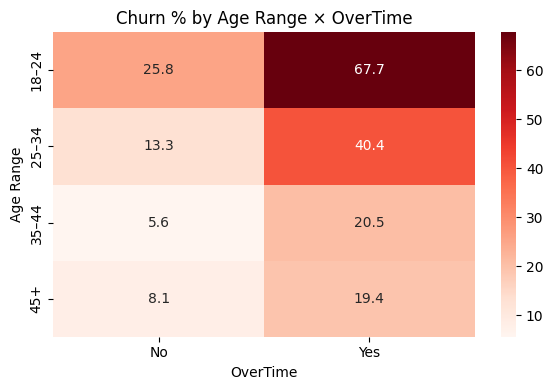

In [68]:
# Jovens entre 18-24 anos que fazem hora extra tem a maior taxa de Churn, 67%. Esse n√∫mero deca√≠ nas pr√≥ximas categorias de faixa-et√°ria, tanto para os que fazem hora extra ou n√£o. 

# *A√ß√£o* : Evitar alocar hora extra em colaboradores muito jovens, buscar grupos de jovens que se voluntariem a fazer hora extra por desejo pr√≥prio, buscando mitigar a insatisfa√ß√£o ou desgaste f√≠sico e mental.

df_heat = df

age_bins   = [18, 25, 35, 45, 61]
age_labels = ['18‚Äì24', '25‚Äì34', '35‚Äì44', '45+']
df_heat['AgeBin'] = pd.cut(df_heat['Age'],bins=age_bins,labels=age_labels,right=False)

heat1 = (df_heat.groupby(['AgeBin','OverTime'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(heat1, annot=True, fmt='.1f', cmap='Reds')
plt.title('Churn % by Age Range √ó OverTime')
plt.xlabel('OverTime')
plt.ylabel('Age Range')
plt.tight_layout()
plt.show()


## 11. Churn por Departamento

In [69]:
# A √°rea de Sales e RH tem as maiores taxas de Churn, 20% e 19%, apesar de terem menos funcion√°rios. J√° R&D, tem o maior n√∫mero de sa√≠das por√©m, com a grande quantidade funcion√°rios torna essa taxa menor, de 13%.

# *A√ß√£o* : Focar em reten√ß√£o direcionada por √°rea pois pode haver grande cobran√ßa por metas e objetivos "inating√≠veis", investigar causas em Sales e RH, e, refor√ßar a√ß√µes de engajamento em R&D, mesmo com churn proporcional mais baixo.

tot_dept  = df["Department"].value_counts()
quit_dept = df[df["Attrition"] == "Yes"]["Department"].value_counts()
pct_dept  = (quit_dept / tot_dept * 100).round(1)

pal_total = ["#FFA07A", "#87CEFA", "#D4A1E7"]
pal_quit  = ["#11264e", "#6faea4", "#FEE08B"] 

plt.figure(figsize=(11,4.5))

plt.subplot(1,2,1)
sns.barplot(x=tot_dept.index,y=tot_dept.values,palette=pal_total[:len(tot_dept)])
plt.title("1) Employees by Department", fontsize=12, fontweight="bold", pad=11)
plt.ylabel("Number of Employees", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=0, fontsize=12)
for i, v in enumerate(tot_dept.values):
    plt.text(i, v + -9, f"{v}", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.subplot(1,2,2)
sns.barplot(x=quit_dept.index,y=quit_dept.values,palette=pal_quit[:len(quit_dept)])
plt.title("2) Employee Attrition by Department", fontsize=12, fontweight="bold", pad=11)
plt.ylabel("Number of Quits", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=0, fontsize=12)
for i, v in enumerate(quit_dept.values):
    pct = pct_dept[quit_dept.index[i]]
    plt.text(i, v + -0.5, f"{v} ({pct}%)", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


## 11.1 üïí Churn por Departamento √ó OverTime


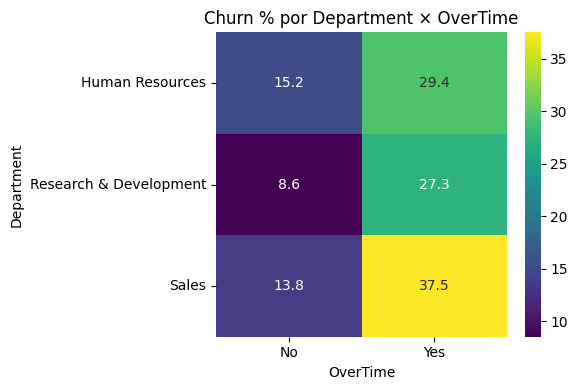

In [70]:
# Anteriormente vimos que o Churn √© claramente mais alto departamentos como Sales e RH. 
# Quando cruzamos os dados com "Overtime", constatamos que pode estar ocorrendo um grande desgaste dessas √°reas com rela√ß√£o as horas extras, j√° que Sales (37,5%) e RH (29,4%) de sa√≠das.

# *A√ß√£o* : Al√©m das medidas j√° sugeridas com rela√ß√£o a compensa√ß√µes, (folgas, b√¥nus, flexibilidade com rela√ß√£o ao hor√°rio),√© importante verificar a possibilidade de reduzir as horas extras.

dept_ot = (df.groupby(['Department','OverTime'])['Attrition'].apply(lambda s: (s=='Yes').mean()*100).unstack())

plt.figure(figsize=(6,4))
sns.heatmap(dept_ot, annot=True, fmt='.1f', cmap='viridis')
plt.title('Churn % por Department √ó OverTime')
plt.xlabel('OverTime')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

## 12. üß≥ Churn por Business Travel √ó Job Level


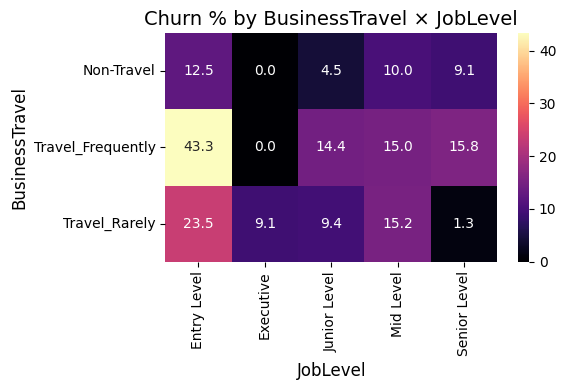

In [71]:
# Funcion√°rios com menor cargo e alta exig√™ncia de viagem demonstram um Churn de 43%, em n√≠veis mais altos, o Churn se mant√©m baixo, independente da frequ√™ncia de viagem.

# Reduzir a exig√™ncia de viagens para funcion√°rios iniciantes, ou, oferecer suporte diferenciado... por exemplo, maior flexibilidade, ajuda de custo, adapta√ß√£o.
bt_jl = (df.groupby(['BusinessTravel', 'JobLevel'])['Attrition'].apply(lambda s: (s == 'Yes').mean() * 100).unstack())

plt.figure(figsize=(6, 4))
sns.heatmap(bt_jl, annot=True, fmt='.1f', cmap='magma')
plt.title('Churn % by BusinessTravel √ó JobLevel', fontsize=14)
plt.xlabel('JobLevel', fontsize=12)
plt.ylabel('BusinessTravel', fontsize=12)
plt.tight_layout()
plt.show()

In [72]:
df.to_csv("ibm_hr_clean.csv", index=False)

## 13. üß© **Problema Proposto:**

A empresa tem uma taxa de rotatividade de 16%, o que afeta diretamente seus custos com desligamento, recrutamento e treinamento. O objetivo √© entender os fatores que est√£o associados ao desligamento volunt√°rio de funcion√°rios, com o objetivo  de desenvolver a√ß√µes que venham mitigar o Turnover e aumentem a reten√ß√£o de talentos.

## 14 üß™ Solu√ß√µes Exploradas

* ‚úÖ Limpeza e pr√©-processamento dos dados
* ‚úÖ An√°lise explorat√≥ria com segmenta√ß√µes por idade, tempo de casa, cargo, horas extras, satisfa√ß√£o e viagens a trabalho.
* ‚úÖ Visualiza√ß√µes estrat√©gicas com gr√°ficos e heatmaps
* ‚úÖ Transforma√ß√µes de vari√°veis categ√≥ricas e ordinais para facilitar a leitura e interpreta√ß√£o dos dados
* ‚úÖ Modelagem preditiva com √°rvore de decis√£o para entender os principais fatores de churn e prever poss√≠veis sa√≠das futuras.



## 15. üìä Resultados Encontrados

* Overtime √© o maior fator de risco de sa√≠da, funcion√°rios que fazem hora extra tem 3x mais propens√£o a sair.
* Funcion√°rios jovens de 18-24 anos, e com pouco tempo de empresa (menos de 2 anos), tem maior chance ao Churn.
* Sales Representatives e √°rea como Recursos Humanos apresentam Churn acima de 35%
* Cargo de entrada (Entry Level) por exemplo, tem maior rotatividade, sugerindo falha de onboarding ou expectativas frustradas.
* Sal√°rios abaixo de U$ 2.700 tamb√©m s√£o fortes indicadores de sa√≠das, tendo um Churn acima de 30%

## 16. üìå A√ß√µes Estrat√©gicas Recomendadas

1.  Reduzir e monitorar horas extras, principalmente entre os jovens e cargos iniciais.
2.  Fortalecer o onboarding e programas de acolhimento nos 6 primeiros meses, principalmente para pessoas que tem pouco tempo de empresa num geral, justificando talvez uma expectativa pouco atingida nos primeiros anos de carreira.
3.  Criar planos de desenvolvimento acelerado, para (Entry Levels e Sales).
4.  Melhorar o equil√≠brio de vida pessoal x trabalho, com iniciativas de sa√∫de mental, flexibiliza√ß√£o de hor√°rio, escala e feedback cont√≠nuo.
5.  Avaliar hist√≥rico de trocas de emprego e lideran√ßa no recrutamento, oferecendo suporte para perfis de alta rotatividade.
6.  Reavaliar as faixas salariais iniciais ou mais baixas, oferecendo incentivos n√£o financeiros e plano de carreira claro.